# Python ile Makine Öğrenmesi

 ## Veri Ön İşleme

### 1-Veri Temizleme(Data Cleaning)

#### 1.1-Görültülü Veri

#### 1.2-Eksik Veri Analaizi

incelenen veri setinde gözlemlerde eksiklik olması durumunu ifade eder.
<img src="image/missing_data.png">
1. satırda eksik bir gözlem mevcut

###### 1.2.1- Eksik Veriyi Direk Silmenin Zararları
Eksik değere sahip gözlemlerin veri setinden direk çıkarılması ve rassalığının 
incelenmemesi yapılacak istatistiksel çıkarımların modelleme çalışmalarının 
güvenilirliğini düşürecektir.(Alpar,2011)

1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir.

<img src="image/eksik_veri1.JPG">

kredi kartına sahip olmayan bir kişinin toplam kredi kartı harcaması olmaması olağan bir durumdur.

2. Boş değer(NA) her zaman eksiklik anlamına gelmez.

<img src="image/eksik_veri2.JPG">

kredi kartına sahip biri bu ay harcama yapmış olmayabilir. burdaki NA değri sıfır anlamına gelmektedir.

3. Bilgi Kaybı

<img src="image/eksik_veri3.JPG">
 
 yukarıdaki görselde 100 değişkenli bir veri setimiz var. eğer biz bir değişken boş diye o gözlemi silsek 99 tane değişken için bilgi kaybetmiş oluruz.

###### 1.2.2 -Eksik Veri Türleri Nelerdir?
1. <strong>Tümüyle Rastlantısal Kayıp</strong>: diğer değişkenlerden ya da yapısal bir problemden kaynaklanmayan tamamen rastgele oluşan gözlemler

2. <strong>Rastlantısal Kayıp</strong>: Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü.

3. <strong>Rastlantısal Olmayan Kayıp</strong>:Göz ardı edilemeyecek olan yapısal problemler ile ortya çıkan eksiklik türü.

###### 1.2.3-Eksik Veri Rassallığının Teknikleri
1. Görsel Teknikler
2. Bağımsız iki Ürneklem T Testi
3. Korelasyon Testi
4. Little'nin MCAR Testi

###### 1.2.4-Eksik Veri Problemi Nsıl Giderilir?
<strong>a.Silme Yöntemleri</strong>
1. Gözlem ya da değişken silme yöntemi
2. Liste bazında silme yöntemi(Listwise Method)
3. Çiftler Bazında Silme Yöntemi(Pairwise Method)

<strong>b. Değer Atama Yöntemleri</strong>
1. Ortanca,ortalama,medyan
2. En Benzer Birime Atama(hot deck)
3. Dış Kaynaklı Atama

<strong>Tahmine Dayalı Yöntemler </strong>
1. Makine Öğrenmesi
2. EM
3. Çoklu Atama Yöntemi


###### 1.2.5 Eksik Veri Analizi Uygulama
<strong>1. Hızlı Çözüm</strong>

In [ ]:
import numpy as np
import pandas as pd

V1=np.array([1,3,6,np.NaN,7,1,np.NaN,2,3])
V2=np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3=np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df=pd.DataFrame({"V1":V1,
                "V2":V2,
                "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,2.0,2.0,2.0
8,3.0,3.0,31.0


###### Eksik Değerlerin Saptanması

In [2]:
#değişkenlerdeki eksik verilere erişme
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

In [3]:
#değişkenlerdeki eksik olmayan verilere erişme
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

In [4]:
#veri setindeki toplam eksik veri sayısı
df.isnull().sum().sum()

7

In [5]:
#eksik verinin olduğu gözlemlere erişme
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [6]:
#eksik verinin olmadığı gözlemlere erişme 
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,2.0,2.0,2.0
8,3.0,3.0,31.0


In [7]:
# In[21]'deki işlemin farklı bir şekilde yapılması
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,2.0,2.0,2.0
8,3.0,3.0,31.0


-<strong> Eksik Değerlerin Direk Silinmesi</strong>

In [8]:
df.dropna()#veri setindeki tüm eksiklikler siliniyor
#df.dropna(inplace=True) -Kalıcıdeğişiklik için kullanılır

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,2.0,2.0,2.0
8,3.0,3.0,31.0


- <strong>Basit Değer Atama</strong>

In [9]:
#ortalama ile doldurma
df["V1"]

0    1.0
1    3.0
2    6.0
3    NaN
4    7.0
5    1.0
6    NaN
7    2.0
8    3.0
Name: V1, dtype: float64

In [10]:
mean=df["V1"].mean()
print("mean",mean)
df["V1"].fillna(mean)

mean 3.2857142857142856


0    1.000000
1    3.000000
2    6.000000
3    3.285714
4    7.000000
5    1.000000
6    3.285714
7    2.000000
8    3.000000
Name: V1, dtype: float64

In [11]:
#ortalama il değilde başka bir değer ile doldurma
df["V2"].fillna(0)

0     7.0
1     0.0
2     5.0
3     8.0
4    12.0
5     0.0
6     0.0
7     2.0
8     3.0
Name: V2, dtype: float64

In [12]:
# birdem fazla değişkendeki eksik gözlem birimlerini bir değer ile doldurma
df=pd.DataFrame({"V1":V1,
                "V2":V2,
                "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,2.0,2.0,2.0
8,3.0,3.0,31.0


In [13]:
df.apply(lambda x: x.fillna(x.mean()),axis=0)#x sütünları temsil ediyor

,V1,V2,V3
0,1.000000,7.000000,11.0
1,3.000000,6.166667,12.0
2,6.000000,5.000000,5.0
3,3.285714,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,6.166667,7.0
6,3.285714,6.166667,11.0
7,2.000000,2.000000,2.0
8,3.000000,3.000000,31.0


###### Eksik Veri Yapısının Görselleştirilmesi

In [14]:
#kütüphane indirilmes
!pip install missingno

In [15]:
import missingno as msno
msno.bar(df);
#grafiğin üstünde yazan değerler tam olan değerleri belirtiyor
#grafiğin sol tarafı verilerin yüzdelik kısmını belirtieken sağ taraf ise toplam
#gözlem sayısına karşılık gelmektedir.

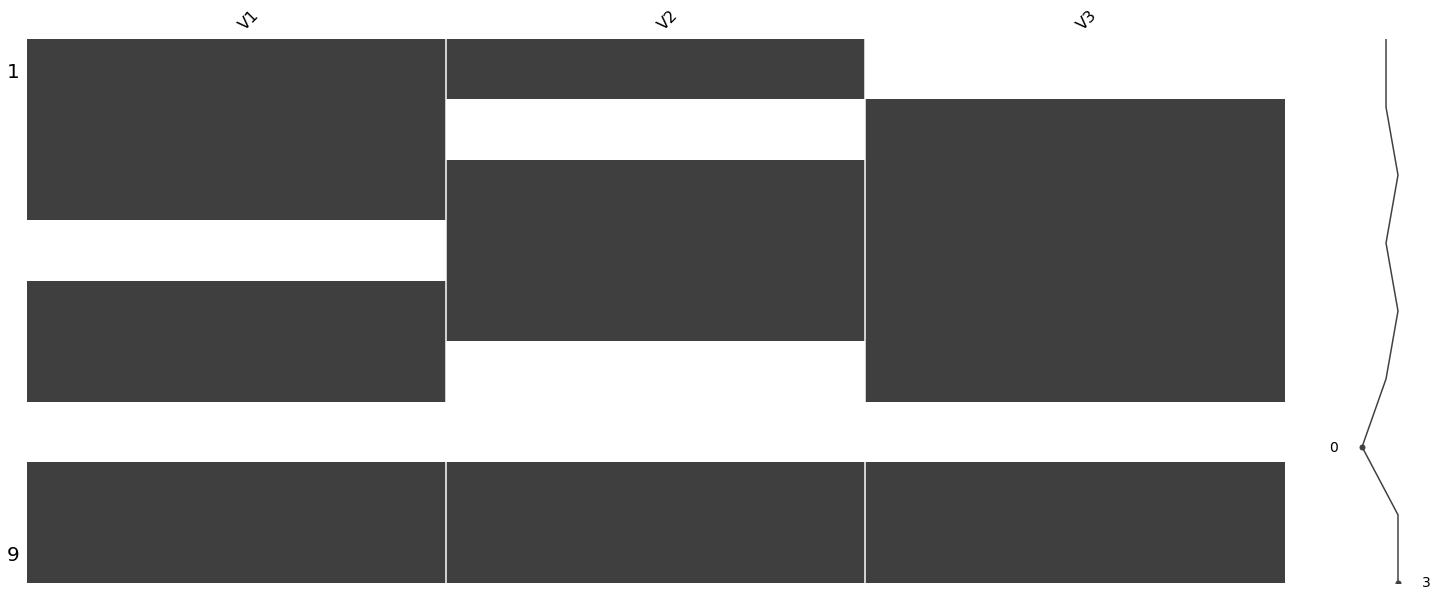

In [16]:
msno.matrix(df)
#sol tarfataki eksen gözlem birimlerini göstermektedir.

In [17]:
#farklı bir dataset üzerinde deneme
import seaborn as sns
df=sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [18]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

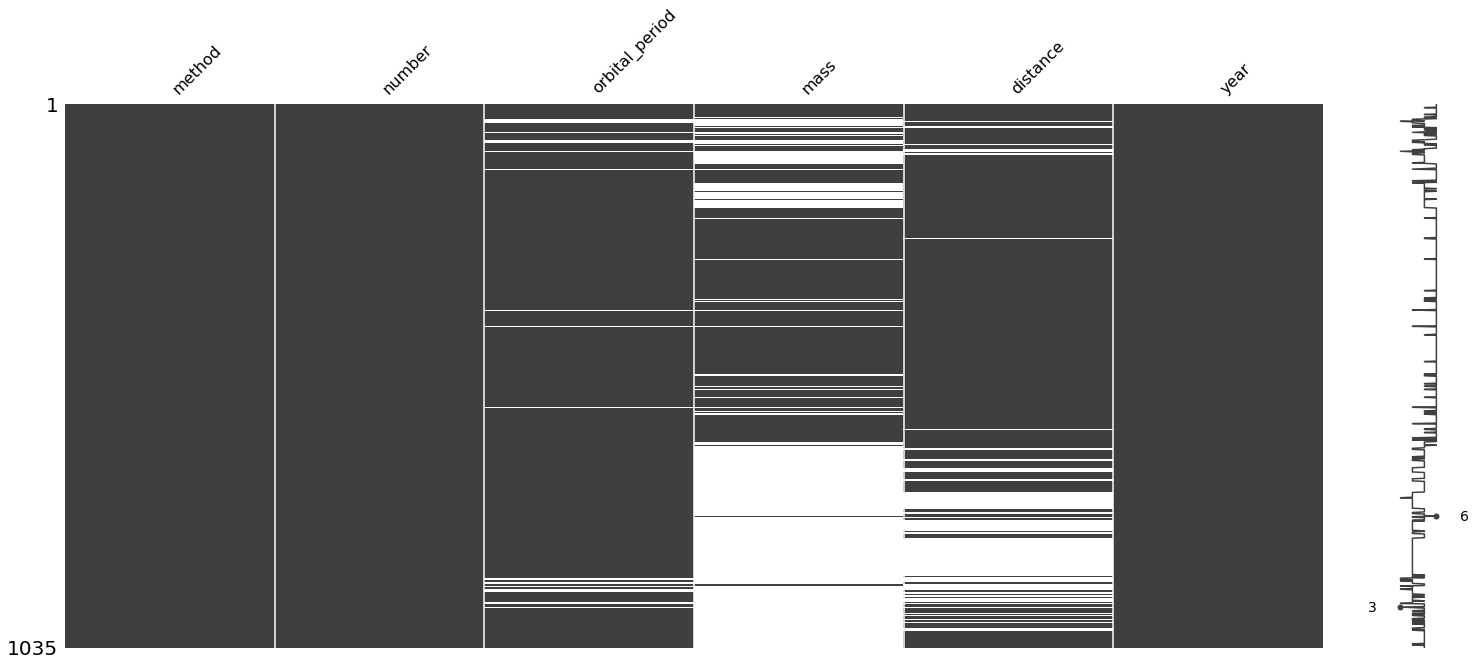

In [19]:
msno.matrix(df)

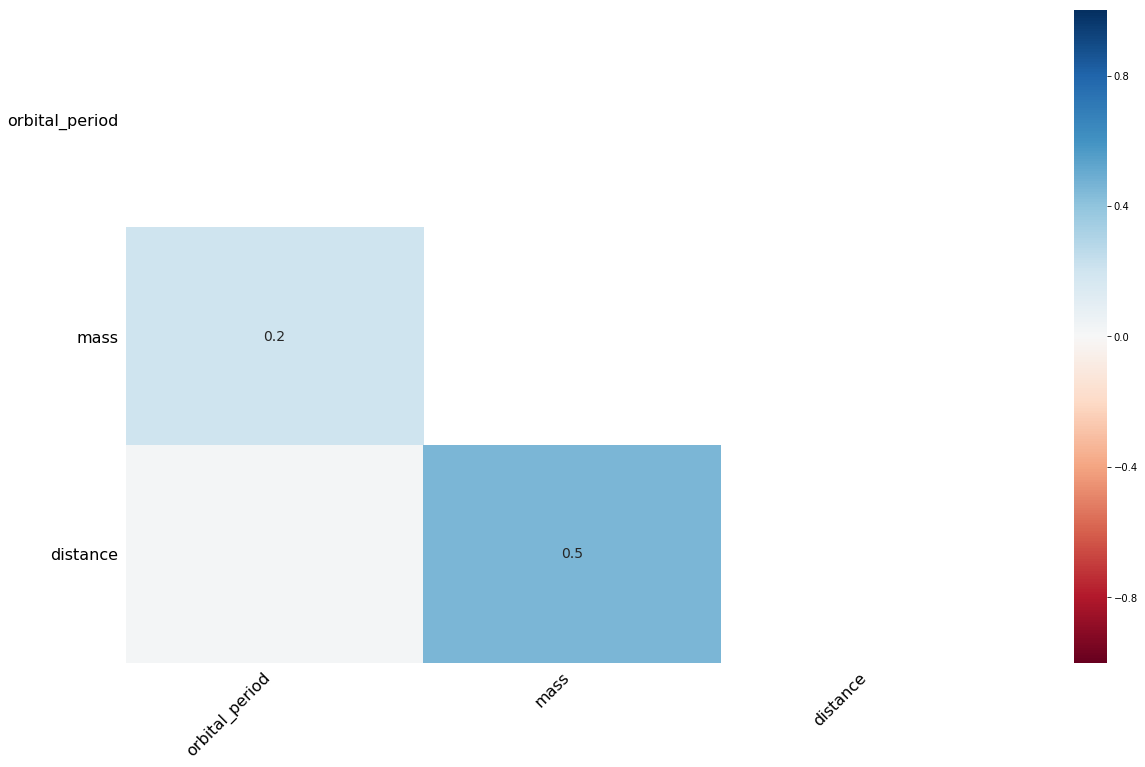

In [20]:
#yukarıdaki grafiğe bakıldığında orbital_period ile mass 
#arasında bir ilişkinin olduğu gözlemleniyo(beyaz çizigilere dikkat)
msno.heatmap(df)#değişkenler arasındaki korelasyonu görmemizi sağlar

###### Silme Yöntemleri

In [21]:
import numpy as np
import pandas as pd

V1=np.array([1,3,6,np.NaN,7,1,np.NaN,2,3])
V2=np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3=np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df=pd.DataFrame({"V1":V1,
                "V2":V2,
                "V3":V3})
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,2.0,2.0,2.0
8,3.0,3.0,31.0


In [22]:
df.dropna()#en az bir değere eksik değere sahip değişkenleri sil

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,2.0,2.0,2.0
8,3.0,3.0,31.0


In [23]:
df.dropna(how="all")#bir gözleme ait tüm değiken değerlei eksik ise sil

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,2.0,2.0,2.0
8,3.0,3.0,31.0


In [24]:
#değişken bazında silme
df.dropna(axis=1)

""
0
1
2
3
4
5
6
7
8


In [25]:
df["sil_beni"]=np.NaN
df

,V1,V2,V3,sil_beni
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,2.0,2.0,2.0,NaN
8,3.0,3.0,31.0,NaN


In [26]:
#tüm değerleri NaN olan dğişkeneleri silme
df.dropna(axis=1,how="all",inplace=True)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,2.0,2.0,2.0
8,3.0,3.0,31.0


In [27]:
###### Basit Değer Atama Yöntemleri
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,2.0,2.0,2.0
8,3.0,3.0,31.0


In [28]:
#sayısal değişkenlerde atama
df["V1"].fillna(0)#0 ile doldurma

0    1.0
1    3.0
2    6.0
3    0.0
4    7.0
5    1.0
6    0.0
7    2.0
8    3.0
Name: V1, dtype: float64

In [29]:
df["V1"].fillna(df["V1"].mean())#ortalama ile doldurma

0    1.000000
1    3.000000
2    6.000000
3    3.285714
4    7.000000
5    1.000000
6    3.285714
7    2.000000
8    3.000000
Name: V1, dtype: float64

In [30]:
#tüm eksik değerleri değişknleri ortalamaları ile doldurma
df.apply(lambda x: x.fillna(x.mean()),axis=0)#1.yol

,V1,V2,V3
0,1.000000,7.000000,11.0
1,3.000000,6.166667,12.0
2,6.000000,5.000000,5.0
3,3.285714,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,6.166667,7.0
6,3.285714,6.166667,11.0
7,2.000000,2.000000,2.0
8,3.000000,3.000000,31.0


In [31]:
df.fillna(df.mean()[:]) #ikinci yol

,V1,V2,V3
0,1.000000,7.000000,11.0
1,3.000000,6.166667,12.0
2,6.000000,5.000000,5.0
3,3.285714,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,6.166667,7.0
6,3.285714,6.166667,11.0
7,2.000000,2.000000,2.0
8,3.000000,3.000000,31.0


In [32]:
#tüm değerleri direk ortalam ile doldurmak problem olabilir
df.fillna(df.mean()["V1":"V2"])#1. ve 2 . değişkeni ortalama ile doldur

,V1,V2,V3
0,1.000000,7.000000,NaN
1,3.000000,6.166667,12.0
2,6.000000,5.000000,5.0
3,3.285714,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,6.166667,7.0
6,3.285714,6.166667,NaN
7,2.000000,2.000000,2.0
8,3.000000,3.000000,31.0


In [33]:
df.V3.fillna(df.V3.median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [34]:
#üçüncü yol
df.where(pd.notna(df),df.mean(),axis="columns")

,V1,V2,V3
0,1.000000,7.000000,11.0
1,3.000000,6.166667,12.0
2,6.000000,5.000000,5.0
3,3.285714,8.000000,6.0
4,7.000000,12.000000,14.0
5,1.000000,6.166667,7.0
6,3.285714,6.166667,11.0
7,2.000000,2.000000,2.0
8,3.000000,3.000000,31.0


#### 1.3-Aykırı Gözlem Analizi

-Aykırılığı ifade eden değere Aykırı Değer denir

-Aykırı değeri barındıran gözlem birimine aykırı gözlem denir.

-veride genel eğimin oldukça dışına çıkan ya da diğer gözlemlerden 
oldukça farklı olan gözlemlere aykırı gözlem denir.

-Aykırılığı ifade eden nümerik değere aykırı değer denir.

NOT:eğer kurulan bir modelin bir genelleme kaygısı varsa, zaten çok seyrek 
    olan senaryolar ve genele uymayan yapılar çalışmanın dışında bırakılmalıdır.

Örneğin ev fiyatı tahmin modelinde 1000m^2 evlerin model dışında tutulması.

##### 1.3.1-Standart Sapma Yaklaşımı
bir değişkenin ortalmasının üzerine aynı değişkenin standart sapması hesaplanarak 
eklenir. 1.2 yada 3 standart sapma değeri ortalama üzerinde eklenerek ortaya çıkan
bu değer eşik değer olarak düşünülür ve bu değerden yukarıda yada aşağıda olan 
değerler aykırı değer olarak tanımlanır.

                         Eşik Değer= Ortalama + 1 * Standart Sapma
                         
##### 1.3.2-Z-Skoru Yaklaşımı
standart sapma yöntemine benzer şekilde çalışır. Değişken standart normal dağılıma uyarlanır, yani standartlaştırılır. sonrasında -örneğin- dağılımın sağından solundan -+2.5 değerine göre bir eşik değer konulur ve bu değerin üzerinde yada altında polan değerler aykırı değer olarak işaretlenir.

##### 1.3.3-Boxplot(interquartile range-IQR) Yöntemi
en sık kullanılan yöntemlerden birisidir. Değişkenin değerleri küçükten büyüğe sıralanır. çeyreklerine(yüzdeliklerine) yani Q1,Q3 değerlerine karşılık değereler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.

                    I     IQR = 1.5*(Q3-Q1)
                          Alt Eşik Değer=Q1-IQR
                          Üst Eşik Değer=Q3+IQR

##### 1.3Aykırı Değerleri Yakalamak (Uygulama)

In [1]:
import seaborn as sns

df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()#veri seti içindeki eksik değerleri siliyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
#veri seti içerisinden bir tane değişken seçelim ve değişken üzerinden aykırı
#değerleri inceleyelim
df_table=df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

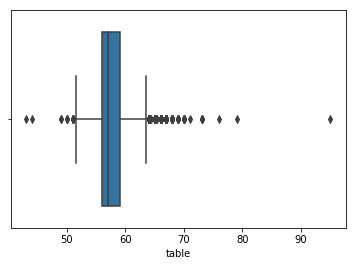

In [3]:
#boxplotu kullanarak değişkenimizi görselleştirelim
sns.boxplot(x=df_table)

In [4]:
#boxplot yaklaşımını kullanarak değişkenimiz için eşik değeri belirleyelim
Q1=df_table.quantile(0.25)#ilk çeyrek
Q3=df_table.quantile(0.75)#3. çeyrek
IQR=Q3-Q1 #inter quartile
print("Q1: ",Q1)
print("Q3: ",Q3)
print("IQR: ",IQR)

Q1:  56.0
Q3:  59.0
IQR:  3.0


In [5]:
alt_esik=Q1-1.5*IQR
ust_esik=Q3+1.5*IQR
print("alt sınır: ",alt_esik)
print("üst sınır: ",ust_esik)

alt sınır:  51.5
üst sınır:  63.5


In [6]:
#şimdi veri seti içinde aykırı değerleri sorgulayalım
(df_table < alt_esik) | (df_table > ust_esik)
#alt sınır için aykırı değerlere bakalım
aykiri_tf=df_table<alt_esik
print("aykiri_tf:\n",aykiri_tf.head())
#şimdi ise aykırı tf'i kullanarak df_table'ın içindeki değerelri bulalım
print("alt sınır için aykiri değerler")
print(df_table[aykiri_tf])
print("aykırı değerlerin bulunduğu indexler")
print(df_table[aykiri_tf].index)

aykiri_tf:
 0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool
alt sınır için aykiri değerler
1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64
aykırı değerlerin bulunduğu indexler
Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')


##### Aykırı değer problemini çözmek

###### 1- Silme

In [7]:
import pandas as pd

In [8]:
#şimdi df_table'in tipini sorgulayalım
print("type df_table: ",type(df_table))
#şimdi df_table'i pandas dataframine çevirelim
df_table=pd.DataFrame(df_table)
print("df_table shape",df_table.shape)

type df_table:  <class 'pandas.core.series.Series'>
df_table shape (53940, 1)


In [9]:
#alt eşik ve üst eşik değerii kullanarak dataframe'in içindeki aykırı olmayan değerlere 
#erişelim
#aykırı değerler olmayan dataframe, "~" işaretini koymamızın sebeb koşulu sağlamayanları al
t_df=df_table[~((df_table < (alt_esik)) | (df_table > (ust_esik))).any(axis=1)] 
print("t_df shape: ",t_df.shape)

t_df shape:  (53335, 1)


##### 2-Ortalame ile Doldurma

In [10]:
#veri setmizi yeniden tanımlayalım
import seaborn as sns

df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()#veri seti içindeki eksik değerleri siliyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [11]:
df_table=df["table"]
mean=df_table.mean()
print("df_table'in ortalaması",mean)
#alt esik için aykırı değerleri kullanalım ilk önce
aykiri_tf=df_table<alt_esik
print("aykiri_tf:\n",aykiri_tf.head())

df_table'in ortalaması 57.45718390804603
aykiri_tf:
 0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool


In [12]:
#şimdi aykırı_tf'i ortalama değerler ile dolduralım
df_table[aykiri_tf]=mean
print("alt eşik için düzenlenmiş aykiri değerler")
print(df_table[aykiri_tf])

alt eşik için düzenlenmiş aykiri değerler
1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


##### 3-Baskılama Yöntemi

aykırı değerler yakalandıktan sonra hangi sınır değerine yakın ise o sınır 
değerine eşitlenir

In [13]:
#veri setmizi yeniden tanımlayalım
import seaborn as sns

df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])
df=df.dropna()#veri seti içindeki eksik değerleri siliyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df_table=df["table"]
#alt eşik için aykırı değerler
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [15]:
#şimdi alt sınır için yakaldığımız aykırı değerleri baskılayacaz
print("alt eşik değeri: ",alt_esik)
df_table[aykiri_tf]=alt_esik
print(df_table[aykiri_tf])

alt eşik değeri:  51.5
1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Çok Değişkenli Aykırı Gözlem Analizi(Uygulama)

değişkenler ayrı ayrı incelendiğinde bir aykırılık olmayabilir. değişkenler birlikte değerlendirildiğinde aykırılıklar ortaya çıkar
###### Local Outlier Factor
Veri setinin tamamına bakıldığında anormal görünmeseler de lokal yoğunlukların
gözlendiği bölgelere odaklanıldığında bu bölgede anormal gözlemler olabilir.
bir noktanın lokal yoğunluğu bu noktanın komşuları ile karşılaştırılır. bir değerin çevresi yoğun değilse demekki bu değer aykırı değerdir şeklinde değerlendiriliyor.
<img src="çok_değ_ayk_drm.JPG"> "ilk satırda aykırılık var"


In [41]:
#veri setinin yüklenmesi
import seaborn as sns
diamonds=sns.load_dataset("diamonds")
diamonds=diamonds.select_dtypes(include=["float64","int64"])
df=diamonds.copy()
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [42]:
#şimdi Local Outlier Factor'ü uygulamak için kütüphane tanımı yapalım
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

#şimdi LocalOutlierFactor fonsiyonunu kullanarak bir skorlama yapalım
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
clf.fit_predict(df) #verimizi algoritmaya fir ediyoruz


array([-1, -1, -1, ...,  1,  1,  1])

In [43]:
df_scores=clf.negative_outlier_factor_ 
print("ilk 20 gözlem için eşik değeri")
print(df_scores[0:20])
print("gözlemlerii küçükten büyüğe doğru sıralayalımve ilk 20 yi gösterelim")
print(np.sort(df_scores)[0:20])

ilk 20 gözlem için eşik değeri
[-1.58352526 -1.59732899 -1.62278873 -1.33002541 -1.30712521 -1.28408436
 -1.28428162 -1.26458706 -1.28422952 -1.27351342 -1.23611906 -1.20830179
 -1.17637026 -1.13060731 -1.14305176 -1.11364018 -1.21093135 -1.13307628
 -1.08093519 -1.08139269]
gözlemlerii küçükten büyüğe doğru sıralayalımve ilk 20 yi gösterelim
[-8.60430658 -8.20889984 -5.86084355 -4.98415175 -4.81502092 -4.81502092
 -4.61522833 -4.37081214 -4.29842288 -4.10492387 -4.0566648  -4.01831733
 -3.94882806 -3.82378797 -3.80135297 -3.75680919 -3.65947378 -3.59249261
 -3.55564138 -3.47157375]


In [44]:
#şimdi kendimize bir eşik değeri belirleyelim
eşik_degeri=np.sort(df_scores)[13]
print("eşik değeri: ",eşik_degeri)

eşik değeri:  -3.823787967755565


In [54]:
#şimdi verimizdeki aykırılıkları ayıkamaya başlayalım
aykiri_tf=df_scores>eşik_degeri
print("aykiri_tf: ")
aykiri_tf 

aykiri_tf: 


array([ True,  True,  True, ...,  True,  True,  True])

###### 1-silme metodu(çok değikenli için)

In [55]:
#şimdi oluşturduğumuz aykiri tf'e göre dataframimizi yeniden düzenleyelim
yeni_df=df[df_scores>eşik_degeri]#aykırı değerlerin bulunmadığı dataframe
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


###### 2-Baskılama Yöntemi
aykırı değerlerin yerine eşik değerindeki değerleri atayalım.

In [56]:
#eşik değerdeki değerler
baski_degeri=df[df_scores==eşik_degeri]
print("baski degeri:")
baski_degeri

baski degeri:


,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [57]:
#aykırı değerleri seçelim
aykirilar = df[~aykiri_tf]
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [64]:
#aykırı değerleri baskı değerler ile değiştirmek için birkaç işlem yapmamız gerekiyor
res=aykirilar.to_records(index=False)
print("aykırıları numpy arraye çeviriyoruz")print(res)

aykırıları numpy arraye çeviriyoruz
[(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12)
 (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12)
 (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06)
 (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19)
 (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65)
 (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37)
 (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84)
 (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42)
 (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85)
 (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 )
 (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12)
 (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58)
 (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)
 (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)]


In [65]:
#şimdi aykırı değerlei baski değeri ile değiştiriyouz
res[:]=baski_degeri.to_records(index=False)
print("değişiklikten sonra aykırı değerler")
print(res)

değişiklikten sonra aykırı değerler
[(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)
 (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)]


In [68]:
#şimdi giderdiğimiz aykırıları veri setimize tekrar ekleyelim
df[~aykiri_tf]=pd.DataFrame(res,index=df[~aykiri_tf].index)
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756.0,4.73,4.5,3.19
10377,0.45,68.6,57.0,756.0,4.73,4.5,3.19
24067,0.45,68.6,57.0,756.0,4.73,4.5,3.19
31230,0.45,68.6,57.0,756.0,4.73,4.5,3.19
35633,0.45,68.6,57.0,756.0,4.73,4.5,3.19
36503,0.45,68.6,57.0,756.0,4.73,4.5,3.19
38840,0.45,68.6,57.0,756.0,4.73,4.5,3.19
41918,0.45,68.6,57.0,756.0,4.73,4.5,3.19
45688,0.45,68.6,57.0,756.0,4.73,4.5,3.19
48410,0.45,68.6,57.0,756.0,4.73,4.5,3.19


##### Tahmine Dayalı Değer Atama Yöntemleri
makina öğrenmesi yöntemlerini kullanarak eksik değerleri doldurma

In [52]:
import seaborn as sns
import missingno as msno

df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64","int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [55]:
#!pip install ycimpute #kütüphane yok ise kod çalıştırılır

In [56]:
from ycimpute.imputer import knnimput
import numpy as np
import pandas as pd

var_names=list(df)#değişken isimleri
n_df=np.array(df)#dataframe to numpy array
n_df[:10]
print("n_df shape:",n_df.shape)

ModuleNotFoundError: No module named 'ycimpute'

In [57]:
#KNN
dff=knnimput.KNN(k=4).complete(n_df)
print(type(dff))

NameError: name 'knnimput' is not defined

In [ ]:
dff=pd.DataFrame(dff,columns=var_names)
dff.isnull().sum()

In [59]:
#Random Forest
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd

df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64","int64"])
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [ ]:
var_names=list(df)#değişken isimleri
n_df=np.array(df)#dataframe to numpy array
n_df[:10]
print("n_df shape:",n_df.shape)

In [ ]:
from ycimpute.imputer import iterforest
dff=iterforest.iterimput().complete(n_df)

In [ ]:
dff=pd.DataFrame(dff,columns=var_names)
dff.isnull().sum()

In [ ]:
#EM algorithm
import seaborn as sns
import missingno as msno
import numpy as np
import pandas as pd

df=sns.load_dataset("titanic")
df=df.select_dtypes(include=["float64","int64"])
df.isnull().sum()

In [ ]:
var_names=list(df)#değişken isimleri
n_df=np.array(df)#dataframe to numpy array
n_df[:10]
print("n_df shape:",n_df.shape)

In [ ]:
from ycimpute.imputer import EM
dff=EM().complete(n_df)

In [ ]:
dff=pd.DataFrame(dff,columns=var_names)
dff.isnull().sum()

### 2-Standartlaştırma

In [63]:
import numpy as np
import pandas as pd

V1=np.array([1,3,6,5,7])
V2=np.array([7,7,5,8,12])
V3=np.array([6,12,5,6,14])

df=pd.DataFrame({"V1":V1,
                "V2":V2,
                "V3":V3})
df=df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


#### 2.1-0-1 Dönüşümü(Normalzation)

In [68]:
from sklearn import preprocessing
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

##### Min-Max Dönüşümü

In [71]:
scaler=preprocessing.MinMaxScaler(feature_range=(10,20))
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

#### 2.2- Z dönüşümü

#### 2.3-Logaritmik Dönüşüm(Log Transformation)

#### 2.4-Standardizasyon

In [65]:
from sklearn import preprocessing
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [67]:
df.mean()

V1    4.4
V2    7.8
V3    8.6
dtype: float64

### 3-Veri İndirgeme(Data Reduction)

#### 3.1-Gözlem Sayısının Azaltılması

#### 3.2-Değişken Sayısının Azaltılması

### 4-Değişken Dönüşümler(Variable Transformation)

#### 4.1-Sürekli Değişkenlerde Dönüşüm

#### 4.2-Kategorik Değişkenlerde Dönüşüm

###### Kategorik Değişken Kırılımında Değer Atama

Eğer elimizde eksikliğini doldurmak üzere bir değişken var ise, öncelikle bu 
değişkeni kategorik başka değişkenlerce indirgeyebiliyormuyuz buna bakmalıyız.

In [38]:
import numpy as np
import pandas as pd

V1=np.array([1,3,6,np.NaN,7,1,np.NaN,2,3])
V2=np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3=np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4=np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
df=pd.DataFrame({"maas":V1,
                "V2":V2,
                "V3":V3,
                "departman":V4})
df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,2.0,2.0,2.0,IT
8,3.0,3.0,31.0,IT


In [39]:
df.groupby("departman")["maas"].mean()#departmanlara göre maaş ortlamaları 

departman
IK    4.666667
IT    2.250000
Name: maas, dtype: float64

In [45]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))
#maaştaki Nan değerleri kategorik bir değişkenin kırılımına göre 
#doldurmak istiyoruz.yani departmanı göz önünde alarak NaN değerleri dolfurduk.

0    1.000000
1    3.000000
2    6.000000
3    4.666667
4    7.000000
5    1.000000
6    4.666667
7    2.000000
8    3.000000
Name: maas, dtype: float64

###### Kategorik Değişkenler için Eksik Değer Atama

In [47]:
import numpy as np
import pandas as pd

V1=np.array([1,3,6,np.NaN,7,1,np.NaN,2,3])
V4=np.array(["IT",np.NaN,"IK","IK","IK","IK","IK","IT","IT"],dtype="object")
df=pd.DataFrame({"maas":V1,
                "departman":V4})
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,2.0,IT
8,3.0,IT


burda en çok kıllanılan yöntem mod yöntemidir. kategorik değişkenin modu alınır.
en çok tekrar eden değer NaN olan değere atanır.

In [49]:
df["departman"].fillna(df.departman.mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [50]:
#boş olan değeri kendisinden önceki veya sonraki değer ile doldurma
df["departman"].fillna(method="bfill")#sonraki değer ile doldurma işlemi

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [51]:
df["departman"].fillna(method="ffill")

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

### Değişken Dönüşümleri

In [73]:
import seaborn as sns
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 0-1 Dönüşümü

In [81]:
#cinsiyet değişkenini dönüştüreli
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
df["yeni_sex"]=lbe.fit_transform(df["sex"])
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


### 1 ve Diğerleri(0) dönüşümü

In [82]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [86]:
df["yeni_day"]=np.where(df["day"].str.contains("Sun"),1,0)
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


### Çok Sınıflı Dönüşüm

In [91]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
df["new_day"]=lbe.fit_transform(df.day)
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2


### One-Hot Encoding ve Dummy Değişken Tuzağı

In [93]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,2


In [95]:
df_one_hot=pd.get_dummies(df,columns=["sex"],prefix=["sex"])
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,2,0,1


In [97]:
df_one_hot=pd.get_dummies(df,columns=["day"],prefix=["day"])
df_one_hot.head()

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,2,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,2,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,2,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,2,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,2,0,0,0,1
